In [4]:
from preamble import *
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# 첫 번째 애플리케이션 : 붓꽃의 품종 분류

데이터 적재

In [5]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [17]:
print("iris_dataset의 키:\n", iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [18]:
print(iris_dataset['DESCR'][:193] + "\n")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre



In [19]:
print("타깃의 이름:", iris_dataset['target_names'])

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [20]:
print("특성의 이름:\n", iris_dataset['feature_names'])

특성의 이름:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
print("data 타입:", type(iris_dataset['data']))

data 타입: <class 'numpy.ndarray'>


In [22]:
print("data 크기:", iris_dataset['data'].shape)

data 크기: (150, 4)


In [23]:
print("data의 처음 다섯 행:\n", iris_dataset['data'][:5])

data의 처음 다섯 행:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [24]:
print("target 타입:", type(iris_dataset['target']))

target 타입: <class 'numpy.ndarray'>


In [25]:
print("target 크기:", iris_dataset['target'].shape)

target 크기: (150,)


In [27]:
print("타깃:\n", iris_dataset['target'])
#0은 타깃의 이름중 setosa
#1은 타깃의 이름중 versicolor
#2은 타깃의 이름중 virginica

타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


성과 측정 : 훈련데이터와 테스트 데이터

In [29]:
#4개의 값이 출력
#X는 입력 특성의 이름의 cm값이 입력됨
#y는 출력 타깃 값이 형성됨
#결과를 증명하기 위해 random_state값은 가지고 있어야 함
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

In [30]:
print("X_train 크기 : ", X_train.shape)
print("y_train 크기 : ", y_train.shape)

X_train 크기 :  (112, 4)
y_train 크기 :  (112,)


In [31]:
print("X_test 크기 : ", X_test.shape)
print("y_test 크기 : ", y_test.shape)

X_test 크기 :  (38, 4)
y_test 크기 :  (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A17CECAC8>,
      dtype=object)

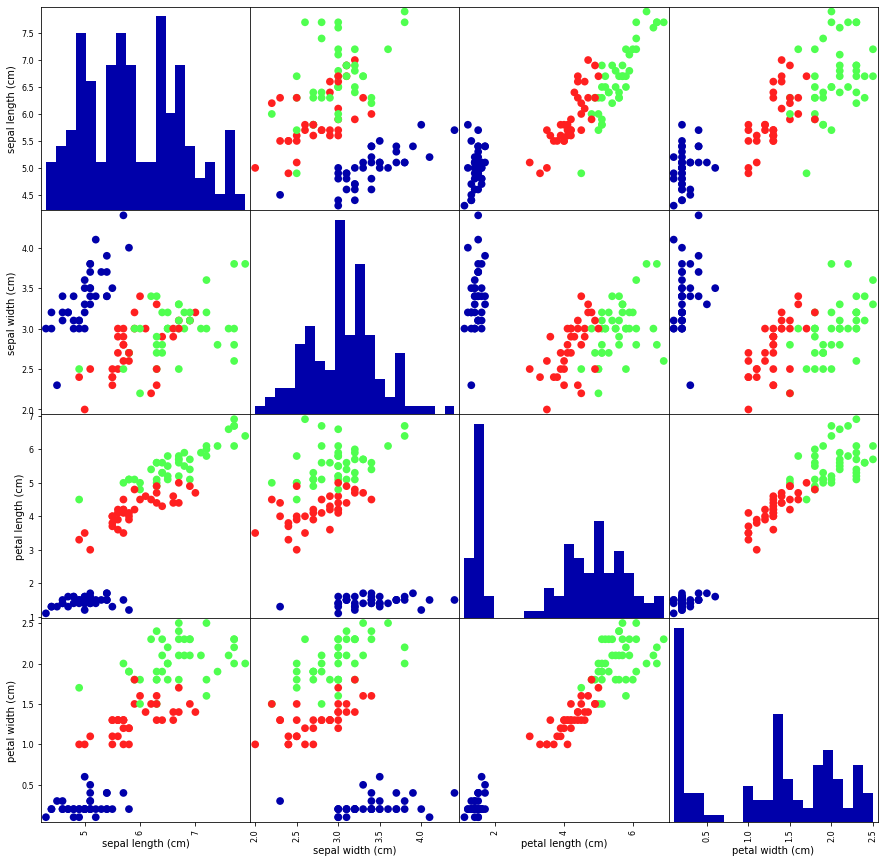

In [40]:
#X_train 데이터를 사용해서 데이터 프레임을 만듬
#열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용함
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
#데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듬
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                          hist_kwds={'bins':20}, s=60, alpha=8, cmap=mglearn.cm3)

첫 번째 머신 러닝 모델: k-최근접 이웃 알고리즘

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

예측하기

In [44]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [45]:
prediction = knn.predict(X_new)
print("예측:", prediction)
print("예측한 타깃의 이름:", iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃의 이름: ['setosa']


모델 평가하기

In [46]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n", y_pred)

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [48]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


In [49]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97
